# Sales Prediction Using Python 

In [1]:
# Import Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read  Data 
df = pd.read_csv('C:\\Users\\vipul\\OneDrive\\Desktop\\Advertising.csv')

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [5]:
df.shape

(200, 5)

In [6]:
df.sample(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
151,152,121.0,8.4,48.7,11.6
83,84,68.4,44.5,35.6,13.6
118,119,125.7,36.9,79.2,15.9
59,60,210.7,29.5,9.3,18.4
187,188,191.1,28.7,18.2,17.3


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [8]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [9]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [10]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [11]:
df[df.duplicated()]

,Unnamed: 0,TV,Radio,Newspaper,Sales


<AxesSubplot:xlabel='TV', ylabel='Sales'>

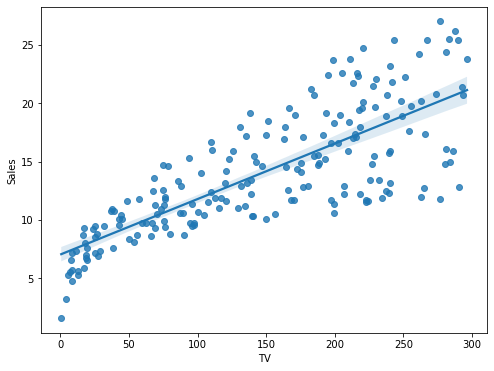

In [12]:
plt.figure(figsize=(8,6))
sns.regplot(x='TV',y='Sales',data=df)


<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

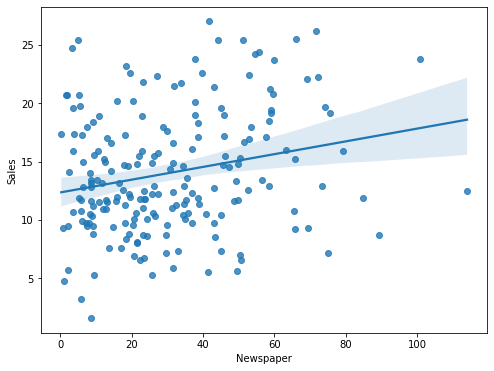

In [13]:
plt.figure(figsize=(8,6))
sns.regplot(x='Newspaper',y='Sales',data=df)

<AxesSubplot:xlabel='Radio', ylabel='Sales'>

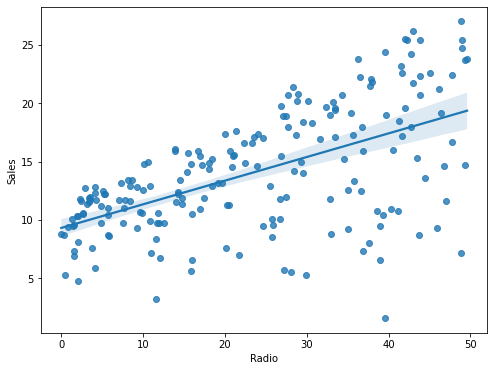

In [14]:
plt.figure(figsize=(8,6))
sns.regplot(x='Radio',y='Sales',data=df)

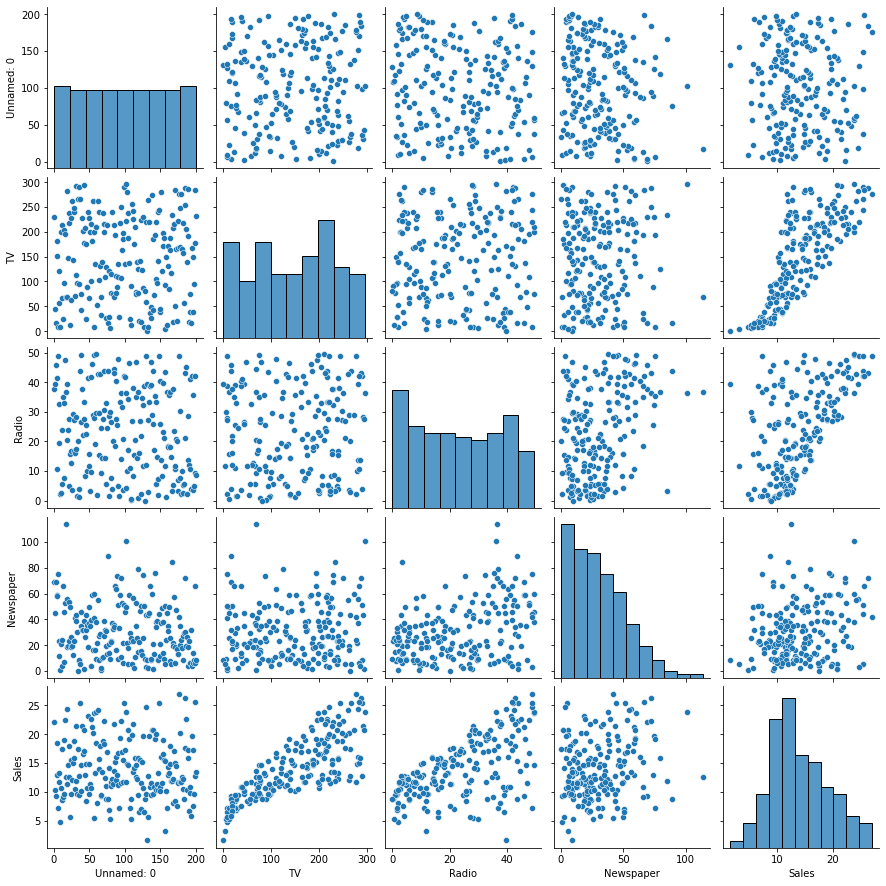

In [15]:
sns.pairplot(df)

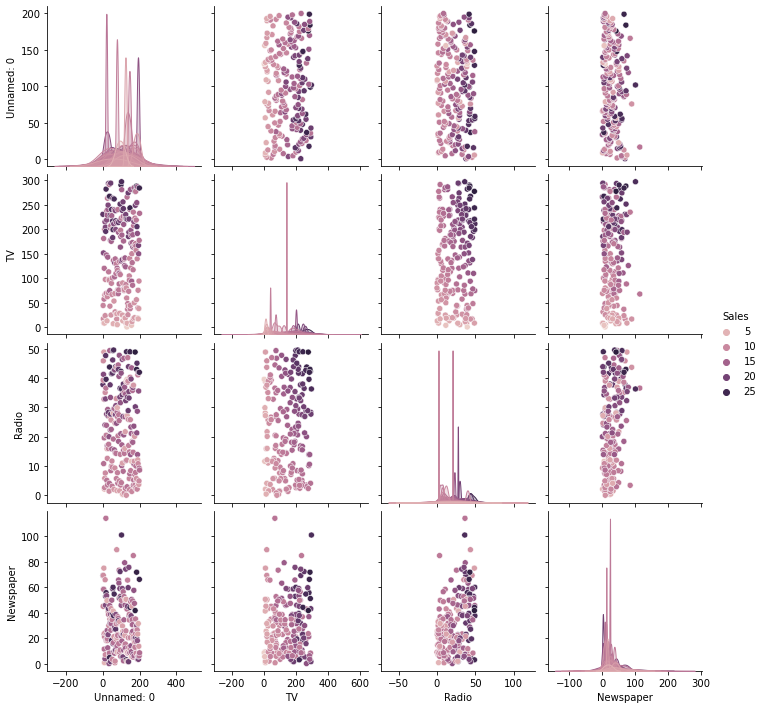

In [16]:
sns.pairplot(data = df , hue = 'Sales')

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [18]:
x=df[ ['Unnamed: 0','TV', 'Radio', 'Newspaper']]
y=df[[ 'Sales' ]]

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OrdinalEncoder
scaler = StandardScaler()
x= scaler.fit_transform(x)

In [20]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=.2,shuffle=True)

In [21]:
model = LinearRegression()

model.fit(x_train,y_train)

LinearRegression()

In [22]:
y_pred = model.predict(x_test)

In [23]:
from sklearn.metrics import r2_score
print(f''' The train accuracy : {r2_score(y_train,model.predict(x_train))}
The test accuracy : {r2_score(y_test , y_pred)}''')

 The train accuracy : 0.8880817644584802
The test accuracy : 0.9268942896191563


In [24]:
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(x_train,y_train)

RandomForestRegressor()

In [25]:
random_f_pred = random_forest.predict(x_test)

In [26]:
r2_score(y_test,random_f_pred)

0.9722172845047474